<a href="https://colab.research.google.com/github/2004-tanu/Natural-Language-Processing/blob/main/NLP_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text mining: Implement a text mining model to analyze customer reviews and identify sentiments
(positive, negative, neutral) and preferences using techniques like sentiment analysis and keyword
extraction.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv",
    engine="python",
    on_bad_lines="warn")

In [4]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
Clothing ID,0
Age,0
Title,3810
Review Text,845
Rating,0
Recommended IND,0
Positive Feedback Count,0
Division Name,14
Department Name,14


In [6]:
df = df.dropna(subset=["Title", "Review Text"])


In [7]:
df = df.dropna(subset=["Division Name", "Department Name", "Class Name"])


In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
Clothing ID,0
Age,0
Title,0
Review Text,0
Rating,0
Recommended IND,0
Positive Feedback Count,0
Division Name,0
Department Name,0


In [9]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [10]:
df.tail()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [11]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000
mean,11755.260655,921.297274,43.260808,4.183145,0.818177,2.652477
std,6772.063092,200.227528,12.258122,1.112224,0.385708,5.834285
min,2.000000,1.000000,18.000000,1.000000,0.000000,0.000000
25%,5888.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11749.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17624.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19662 entries, 2 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               19662 non-null  int64 
 1   Clothing ID              19662 non-null  int64 
 2   Age                      19662 non-null  int64 
 3   Title                    19662 non-null  object
 4   Review Text              19662 non-null  object
 5   Rating                   19662 non-null  int64 
 6   Recommended IND          19662 non-null  int64 
 7   Positive Feedback Count  19662 non-null  int64 
 8   Division Name            19662 non-null  object
 9   Department Name          19662 non-null  object
 10  Class Name               19662 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.8+ MB


In [13]:
df.ndim

2

In [15]:
df.size

216282

In [16]:
df["Review Text"] = df["Review Text"].str.lower()
df["Review Text"] = df["Review Text"].str.replace("[^a-zA-Z ]", "", regex=True)
df.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,i love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,i love tracy reese dresses but this one is not...,2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download("punkt")
nltk.download("stopwords")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

nltk.download('punkt_tab') # Add this line to download the missing resource
df["clean_review"] = df["Review Text"].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,clean_review
2,2,1077,60,Some major design flaws,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hopes dress really wanted work initially ...
3,3,1049,50,My favorite buy!,i love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous ev...
4,4,847,47,Flattering shirt,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering due adjustable front tie perf...
5,5,1080,49,Not for the very petite,i love tracy reese dresses but this one is not...,2,0,4,General,Dresses,Dresses,love tracy reese dresses one petite feet tall ...
6,6,858,39,Cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,aded basket hte last mintue see would look lik...


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [21]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df["clean_review"])


In [22]:
y = df["Rating"]


In [23]:
y = y.apply(lambda x: "positive" if x >= 4 else "negative" if x <= 2 else "neutral")


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [25]:
from sklearn.linear_model import LogisticRegression


In [26]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [27]:
y_pred = model.predict(X_test)


In [28]:
from sklearn.metrics import accuracy_score, classification_report


In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8278667683702009
              precision    recall  f1-score   support

    negative       0.62      0.39      0.48       437
     neutral       0.37      0.27      0.32       419
    positive       0.89      0.96      0.92      3077

    accuracy                           0.83      3933
   macro avg       0.63      0.54      0.57      3933
weighted avg       0.80      0.83      0.81      3933



In [30]:
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = X.mean(axis=0).A1


In [31]:
keywords = pd.DataFrame({
    "keyword": feature_names,
    "score": tfidf_scores
}).sort_values(by="score", ascending=False)

keywords.head(10)


,keyword,score
762,dress,0.043483
1488,love,0.036582
2292,size,0.034282
2670,top,0.032631
955,fit,0.030263
1122,great,0.030001
1439,like,0.028291
2864,wear,0.027667
1264,im,0.025284
493,color,0.022705


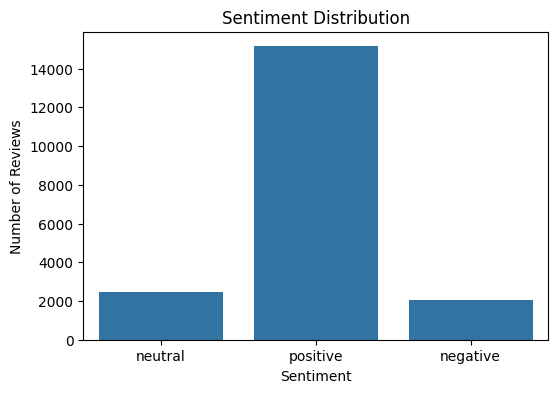

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()
